### LDA Modeling for Cluster Visualisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import os
from tqdm import tqdm

# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.sparse import save_npz, load_npz

from preprocessing import load_cleaned_metadata, clean_text_lda, get_clean_write
from data_access import get_txt
from my_lda import MyCorpus
import my_lda

In [2]:
# df = load_cleaned_metadata('data/processed/metadata_clean.csv.gz')
# len(df)

In [3]:
# df = pd.read_csv('results/final_models/metadata_2021.csv.gz', sep='\t', compression='gzip')
# df.date = pd.to_datetime(df.date)
# len(df)

53758

## Create corpus and dictionary

Required output:
- topic profile of every document
- visualisation of topics

> "[Gensim](https://radimrehurek.com/gensim/auto_examples/core/run_corpora_and_vector_spaces.html#corpus-streaming-tutorial) accepts any object that, when iterated over, successively yields documents."

In [3]:
# list of full paths for documents to be accessed
corpus_directory = 'results/final_models/lda_2021_corpus_clean/'
# ids = df.cord_uid.tolist()
doc_path_list = [corpus_directory + file for file in os.listdir(corpus_directory) if file.endswith('.txt')]
# initiate corpus object
save_directory = 'results/final_models/'
dictionary = Dictionary.load(save_directory+'dictionary.dict')
corpus = MyCorpus(doc_path_list, dictionary=dictionary)

In [5]:
print(len(corpus))
print(len(corpus.dictionary))

53758
100000


### Train model

In [5]:
num_topics = 20
alpha = 0.01
eta = 0.01

filename = f'lda_{num_topics}_{alpha}_{eta}'

In [7]:
# model = LdaModel(corpus, num_topics=num_topics, id2word=corpus.id2word, alpha=alpha, eta=eta)

In [8]:
# model.save(save_directory+filename+"_model")

In [6]:
model = LdaModel.load(save_directory+filename+"_model")

### Visualise

In [10]:
# vis = gensimvis.prepare(model, corpus, corpus.dictionary, sort_topics=False)
# pyLDAvis.save_html(vis, save_directory+filename+'_vis.html')

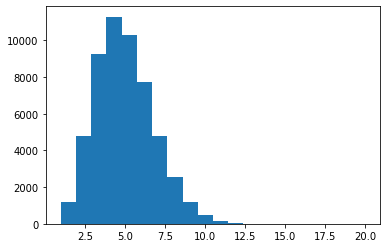

In [47]:
# check number of topics per document

# my_lda.topics_per_doc(model, corpus)

In [ ]:
# list top words in topic
def topic_words(topic_no, topn=30):
    ids = model.get_topic_terms(topic_no, topn=50)
    words = [corpus.id2word[i] for i, amt in ids]
    return words

topic_words(7)

# Cluster documents

### Create document-topic matrix

In [7]:
dtm = my_lda.doc_topic_matrix(corpus, model)

100%|██████████| 53758/53758 [05:34<00:00, 160.93it/s]


### Run PCA

In [1]:
pca = PCA(n_components=2, random_state=458).fit(dtm)
dtm_pca = pca.transform(dtm)

NameError: name 'PCA' is not defined

In [ ]:
dtm_pca.shape

### Visualise

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=dtm_pca, x='PC1', y='PC2')